In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM
from keras.layers.wrappers import Bidirectional # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# training:
epochs = 6
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 200 # doubled!
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# LSTM layer architecture:
n_lstm = 256 
drop_lstm = 0.2

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               657408    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,297,921
Trainable params: 1,297,921
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
modelcheckpoint = ModelCheckpoint(filepath="/weights.bilstm.{epoch:02d}.hdf5")

In [8]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/6
196/196 [==============================] - 694s 3s/step - loss: 0.6531 - accuracy: 0.5969 - val_loss: 0.3472 - val_accuracy: 0.8511
Epoch 2/6
196/196 [==============================] - 674s 3s/step - loss: 0.2895 - accuracy: 0.8829 - val_loss: 0.3576 - val_accuracy: 0.8464
Epoch 3/6
196/196 [==============================] - 677s 3s/step - loss: 0.2400 - accuracy: 0.9091 - val_loss: 0.3507 - val_accuracy: 0.8636
Epoch 4/6
196/196 [==============================] - 677s 3s/step - loss: 0.1765 - accuracy: 0.9366 - val_loss: 0.3327 - val_accuracy: 0.8668
Epoch 5/6
196/196 [==============================] - 670s 3s/step - loss: 0.1359 - accuracy: 0.9530 - val_loss: 0.3730 - val_accuracy: 0.8608
Epoch 6/6
196/196 [==============================] - 670s 3s/step - loss: 0.1182 - accuracy: 0.9590 - val_loss: 0.3709 - val_accuracy: 0.8588


In [10]:
model.load_weights("/weights.bilstm.05.hdf5")

In [11]:
y_hat = model.predict_proba(x_valid)

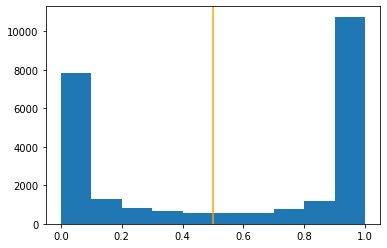

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [13]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'93.80'